<a href="https://colab.research.google.com/github/marcojr93/data-science-portifolio/blob/main/Beer_consumption_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This project aims to show impacts of some variables on beer consumers behavior in order to predict the consumption in some Brazilian regions.

This study section will be used to training data analysis and visualization skills

# Libraries and dataset

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
df = pd.read_csv('beer_consumption_data.csv', sep = ";")
df.head(5)

,date,temp_avg,temp_min,temp_max,rain,weekend,consumption
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


# EDA

In [4]:
df.describe()

,temp_avg,temp_min,temp_max,rain,weekend,consumption
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
std,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703
min,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000


In [5]:
df.shape

(365, 7)

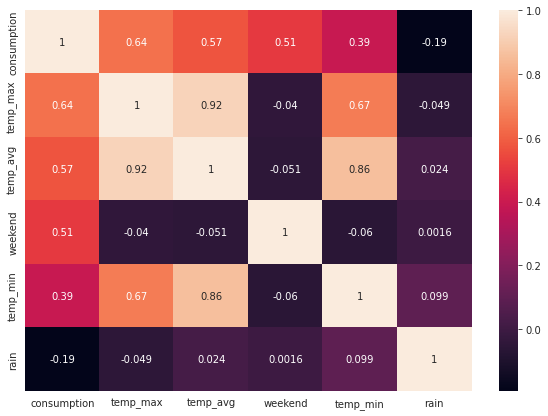

In [10]:
# Correlation matrix is a tool that shows the relationship between the variables

f, ax = plt.subplots(figsize = (10,7))
correlacao = df.corr()
top_correlacao = df[correlacao.consumption.sort_values(ascending = False)[:10].index].corr()
sns.heatmap(top_correlacao, annot = True)
plt.show()

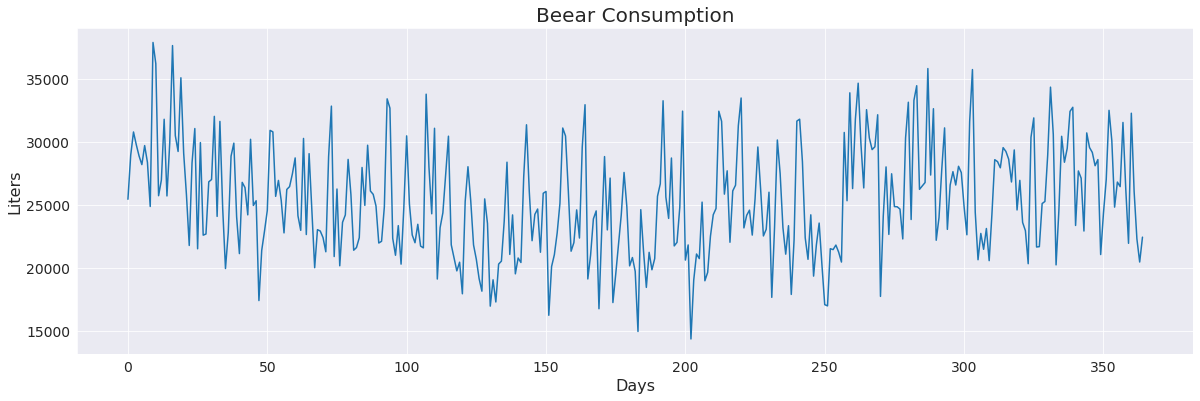

In [12]:
fig, ax = plt.subplots(figsize=(20,6))

ax.set_title('Beear Consumption', fontsize=20)
ax.set_ylabel('Liters', fontsize=16)
ax.set_xlabel('Days', fontsize=16)
ax = df['consumption'].plot(fontsize=14)

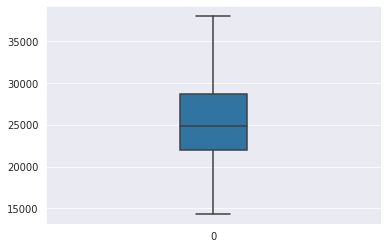

In [13]:
ax = sns.boxplot(data=df['consumption'], orient='v', width=0.2)

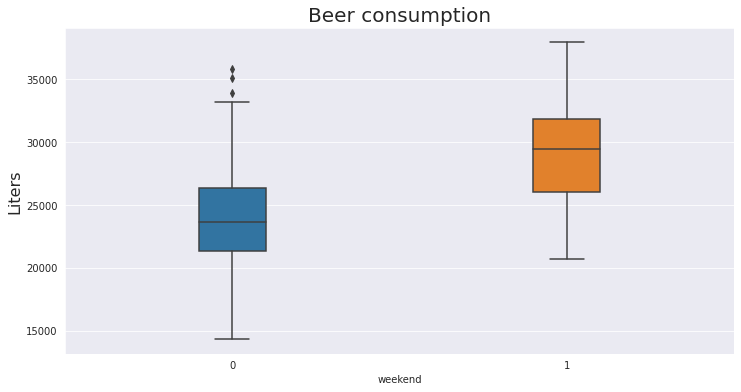

In [14]:
ax = sns.boxplot(x = 'weekend', y = 'consumption', data=df, orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Beer consumption', fontsize=20)
ax.set_ylabel('Liters', fontsize=16)
ax

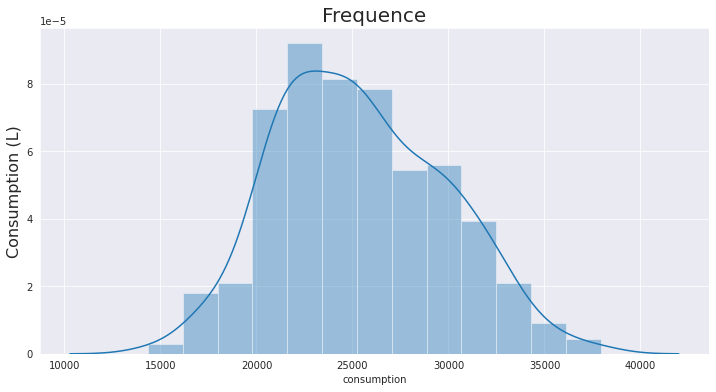

In [15]:
ax = sns.distplot(df['consumption'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequence', fontsize=20)
ax.set_ylabel('Consumption (L)', fontsize=16)
ax

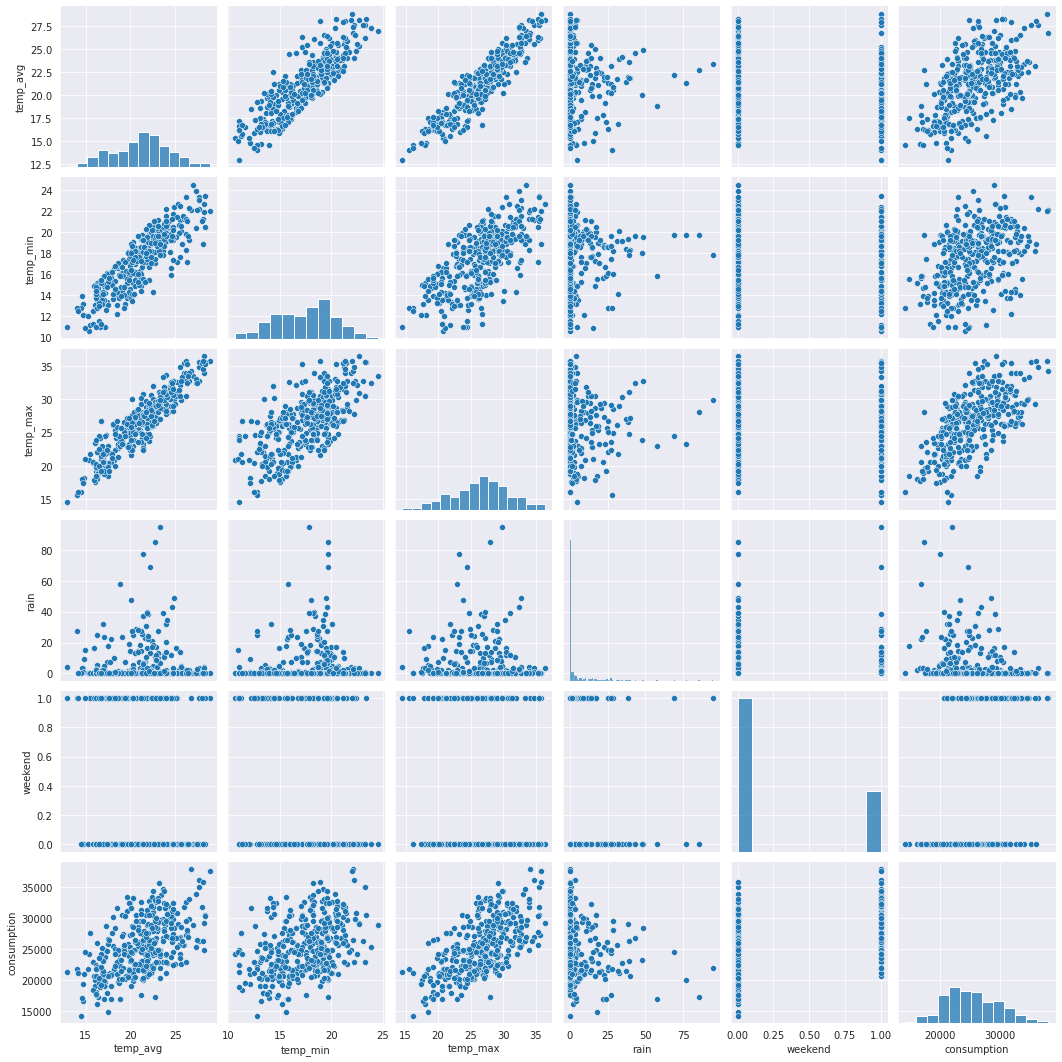

In [16]:
ax = sns.pairplot(df)

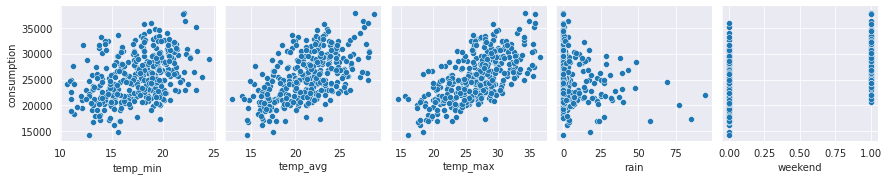

In [17]:
ax = sns.pairplot(df, y_vars='consumption', x_vars=['temp_min', 'temp_avg', 'temp_max', 'rain', 'weekend'])

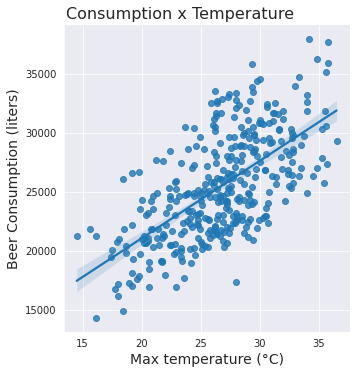

In [35]:
# Grafic representation
ax= sns.lmplot(x="temp_max", y="consumption", data=df)
ax.fig.suptitle('Consumption x Temperature', fontsize=16, y=1.02)
ax.set_xlabels("Max temperature (°C)", fontsize=14)
ax.set_ylabels("Beer Consumption (liters)", fontsize=14)
ax

There is a linear relationship between the vars and consumption.

# Linear Regression model

## Modelo preparation

In [ ]:
# Linear Regression Documentation
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [19]:
# Split the dataset on train and test classes

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Y variable - what we want to predict
y = df['consumption']
# X variables - what we will varie
X = df[['temp_max', 'rain', 'weekend']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2811)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Model ready")

Model ready


In statistics, the coefficient of determination, denoted R2 or r² and pronounced "R squared", is the proportion of the variation in the dependent variable that is predictable from the independent variable(s)

It is a statistic used in the context of statistical models whose main purpose is either the prediction of future outcomes or the testing of hypotheses, on the basis of other related information. It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model

In [24]:
# R2 determination
print('The train data model R² value is: {}'.format(model.score(X_train, y_train).round(2)))

The train data model R² value is = 0.74


In [29]:
y_predict = model.predict(X_test)
print('R² for test data is: %s' % metrics.r2_score(y_test, y_predict).round(2))

R² for test data is: 0.68


## Testing predictions

In [30]:
# Input

input_test = X_test[0:1]
input_test

,temp_max,rain,weekend
5,30.5,12.2,0


In [31]:
consum_pred = model.predict(input_test)
consum_pred[0]

26104.902268612546

In [34]:
# Testing some random values

temp_max = 33
rain = 10
weekend = 1 # yes = 1; no = 0
input_test = [[temp_max, rain, weekend]]

print('{0:.2f} liters of beer'.format(model.predict(input_test)[0]))

33338.39 liters of beer


## Coefficients analysis

In [45]:
# The regression coefficients evaluates the impacto in Y varibale for each X's variation
model.coef_

array([ 688.30033749,  -60.40192927, 5379.85493077])

In [41]:
# The intercept is the point where the function crosses the y-axis. 
# In some analysis, the regression model only becomes significant when 
# we remove the intercept, and the regression line reduces to Y = bX + error.

model.intercept_.round(2)

5848.65

In [42]:
X.columns

Index(['temp_max', 'rain', 'weekend'], dtype='object')

In [43]:
index = ['Intercept', 'Max Temperature', 'Rain', 'Weekend']

In [44]:
pd.DataFrame(data=np.append(model.intercept_, model.coef_), index = index, columns = ['Values'])

,Values
Intercept,5848.645512
Max Temperature,688.300337
Rain,-60.401929
Weekend,5379.854931


## Model analysis conclusion

Looking the previous table we can assure that Max. Temperature and Weekend are the most important variables that influencces the beer consumptiom. 

1.   The consumption increases 688 L when the weather is close to the maximum temperature
2.   Weekends increases the consumptiom in 5379 L



# Beer consumption prediction based on brazilian average temperature

The brazilian temperature average in each region is shown bellow by the picture. It will be used as base for our reaserch

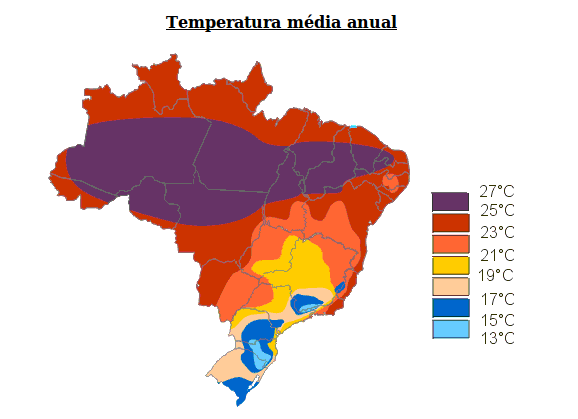

In [56]:
# Consumption predict due to Brazilian average annual temperature

import itertools

lines = []

input_data = X_test[0:1]
input_data

weekend = 1 # As shown before, the weekeng increases the consumption, for this reason, let's consider only fds

for (i,j) in itertools.product(range(13,27),range(0,95)):
          temp_avg = i
          rain = j
          input_data = [[temp_avg,	rain,	weekend]]
          consumption = model.predict(input_data)[0]

          lines.append([temp_avg, rain, consumption])

df_new = pd.DataFrame(lines, columns = ["Temperature", "Rain", "Consumption"])
print("Concluded")

Concluded


In [58]:
# Exporting the new dataset
df_new.to_csv("consumption_brazil.csv") 
print("Dataset ready")

Dataset ready


In [61]:
# This fuction will show what is the best condition of rain and temperature to provides the largest beer consumption
df_new.nlargest(1, 'Consumption')

,Temperature,Rain,Consumption
1235,26,0,29124.309218


In conclusion, north and northeast regions will be the best place to sell beer 🍺

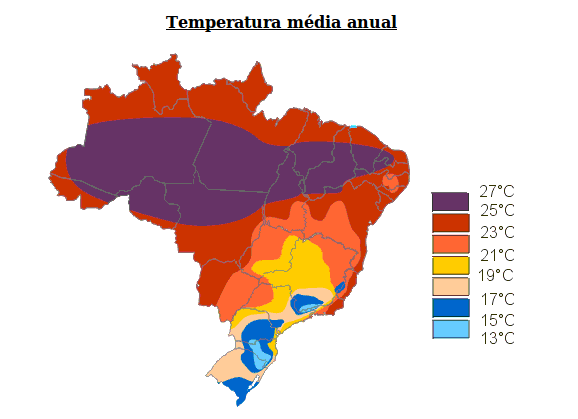